- 라쏘회귀(L1 규제)
- 릿지회귀(L2 규제)
- 엘라스틱넷(L1, L2 규제)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 릿지 회귀로 보스턴 집값 예측

In [2]:
# 앞의 LinearRegression 예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 y_target 데이터셋을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이터셋 로드
bostonDF = pd.read_csv('../datasets/Boston.csv')

y_target = bostonDF['medv']
X_data = bostonDF.drop(columns='medv')

# 릿지 클래스
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 fold의 RMSE scores :', np.round(rmse_scores, 3))
print('5 fold의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-14.604 -24.249 -28.83  -74.663 -27.7  ]
5 fold의 RMSE scores : [3.821 4.924 5.369 8.641 5.263]
5 fold의 평균 RMSE : 5.604


In [3]:
# alpha값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE값 측정
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 fold의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 fold의 평균 RMSE : 5.844
alpha 0.1일 때 5 fold의 평균 RMSE : 5.807
alpha 1일 때 5 fold의 평균 RMSE : 5.693
alpha 10일 때 5 fold의 평균 RMSE : 5.604
alpha 100일 때 5 fold의 평균 RMSE : 5.500


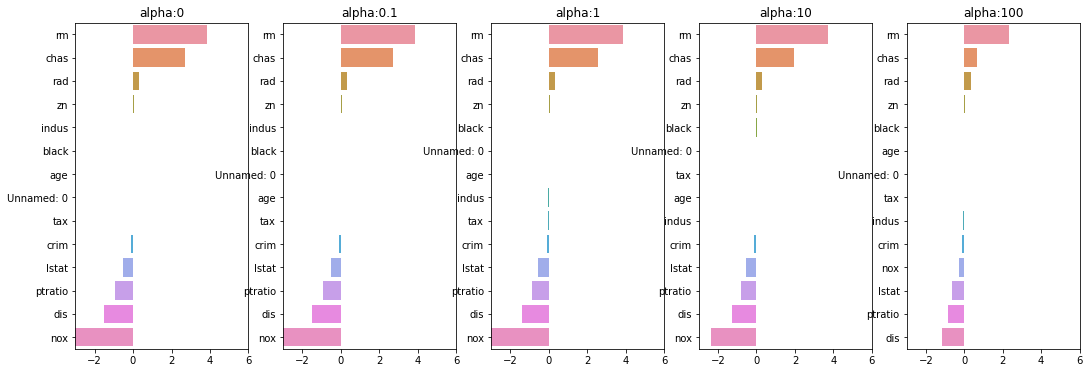

In [4]:
# 알파 값이 증가할수록 실제로 회귀 계수 값이 작아지는지 확인해보기

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플로립 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False) # 회귀 계수 값이 높은 순으로 정렬
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

# for문 바깥에서 맷플로립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [5]:
# 알파값에 따른 회귀 계수 출력
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.839225,3.847742,3.884133,3.730589,2.348374
chas,2.705245,2.688771,2.572215,1.968828,0.642700
rad,0.324925,0.322626,0.310511,0.301086,0.332157
zn,0.048031,0.048197,0.049148,0.051333,0.055823
indus,0.019932,0.015425,-0.009068,-0.042707,-0.052455
black,0.009357,0.009413,0.009716,0.010075,0.009416
age,-0.001938,-0.002915,-0.008131,-0.013394,-0.000734
Unnamed: 0,-0.002526,-0.002553,-0.002694,-0.002796,-0.002172
tax,-0.011598,-0.011675,-0.012119,-0.013164,-0.015208
crim,-0.108762,-0.108240,-0.105445,-0.102379,-0.102900


## 라쏘 회귀
- L2규제는 회귀 계수의 크기를 감소시키지만 L1규제는 불필요한 회귀계수를 0으로 만듦
- L2 규제 : 이상치나 노이즈가 있는 데이터에 대한 학습을 진행할 때 사용하면 좋음 / 회귀 계수 값의 증감을 관리
- L1 규제 : 가중치의 크기에 상관없이 상수값을 뺌 / 적절한 피처만 포함시키는 피처 셀렉션의 특성을 가짐

In [6]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환해주는 함수
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True):
    coeff_df = pd.DataFrame()
    if verbose : print("#######", model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso': model = Lasso(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 fold 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))

        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
        coeff = pd.Series(data = model.coef_, index = X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [7]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

####### Lasso #######
alpha 0.07일 때 5 fold 세트의 평균 RMSE : 5.714
alpha 0.1일 때 5 fold 세트의 평균 RMSE : 5.731
alpha 0.5일 때 5 fold 세트의 평균 RMSE : 5.868
alpha 1일 때 5 fold 세트의 평균 RMSE : 6.082
alpha 3일 때 5 fold 세트의 평균 RMSE : 6.783


In [8]:
# 반환된 coeff_lasso_df를 첫번째 컬럼 순으로 내림파순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.818942,3.731253,2.514752,0.951835,0.000000
chas,1.456124,0.976090,0.000000,0.000000,0.000000
rad,0.292072,0.295033,0.289568,0.266066,0.043498
zn,0.050777,0.050862,0.050519,0.049306,0.036391
black,0.010285,0.010284,0.009491,0.008250,0.006497
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
Unnamed: 0,-0.002738,-0.002631,-0.001545,-0.000216,0.002388
tax,-0.013477,-0.013789,-0.014993,-0.015155,-0.009370
age,-0.014332,-0.012560,0.002135,0.020707,0.043925
indus,-0.041745,-0.036255,-0.004927,-0.000000,-0.000000


In [9]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

####### ElasticNet #######
alpha 0.07일 때 5 fold 세트의 평균 RMSE : 5.647
alpha 0.1일 때 5 fold 세트의 평균 RMSE : 5.645
alpha 0.5일 때 5 fold 세트의 평균 RMSE : 5.682
alpha 1일 때 5 fold 세트의 평균 RMSE : 5.902
alpha 3일 때 5 fold 세트의 평균 RMSE : 6.607


In [10]:
# 반환된 coeff_elastic_df를 첫번째 컬럼 순으로 내림파순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.601129,3.438970,1.928772,0.941199,0.000000
chas,1.346550,0.993541,0.000000,0.000000,0.000000
rad,0.299580,0.303398,0.312441,0.293131,0.133409
zn,0.051794,0.052230,0.053800,0.052423,0.037272
black,0.010158,0.010100,0.009132,0.008325,0.007012
Unnamed: 0,-0.002684,-0.002573,-0.001486,-0.000479,0.001819
age,-0.012691,-0.010708,0.006419,0.019934,0.044864
tax,-0.013729,-0.014053,-0.015613,-0.016078,-0.012004
indus,-0.044587,-0.042322,-0.022934,-0.000000,-0.000000
crim,-0.100386,-0.100111,-0.089590,-0.073759,-0.018629


## 데이터 전처리
- 피처 데이터 변환에 따른 예측 성능 비교

(506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

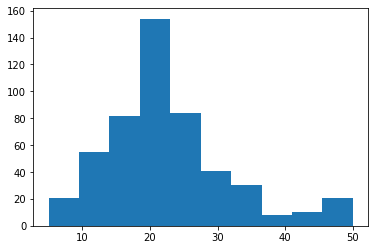

In [11]:
print(y_target.shape)
plt.hist(y_target, bins = 10)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method = 'None', p_degree = None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
    
    return scaled_data

In [14]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
    print('\n## 변환 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))

    # alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환해주는 함수
    get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False)


## 변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 fold 세트의 평균 RMSE : 5.807
alpha 1일 때 5 fold 세트의 평균 RMSE : 5.693
alpha 10일 때 5 fold 세트의 평균 RMSE : 5.604
alpha 100일 때 5 fold 세트의 평균 RMSE : 5.500

## 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 fold 세트의 평균 RMSE : 5.841
alpha 1일 때 5 fold 세트의 평균 RMSE : 5.821
alpha 10일 때 5 fold 세트의 평균 RMSE : 5.681
alpha 100일 때 5 fold 세트의 평균 RMSE : 5.538

## 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 fold 세트의 평균 RMSE : 9.700
alpha 1일 때 5 fold 세트의 평균 RMSE : 7.583
alpha 10일 때 5 fold 세트의 평균 RMSE : 5.991
alpha 100일 때 5 fold 세트의 평균 RMSE : 4.817

## 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 fold 세트의 평균 RMSE : 5.787
alpha 1일 때 5 fold 세트의 평균 RMSE : 5.547
alpha 10일 때 5 fold 세트의 평균 RMSE : 5.933
alpha 100일 때 5 fold 세트의 평균 RMSE : 7.720

## 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 fold 세트의 평균 RMSE : 6.187
alpha 1일 때 5 fold 세트의 평균 RMSE : 4.567
alpha 10일 때 5 fold 세트의 평균 RMSE : 5.306
alpha 100일 때 5 fold 세트의 평균 RMSE : 

## 로지스틱 회귀

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 위스콘신 유방암 데이터 불러오기
cancer = load_breast_cancer()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.977
roc_auc: 0.972


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {'penalty': ['l2', 'l1'],
          'C': [0.01, 0.1, 1, 5, 10],
          'solver': ['liblinear']}  # l1 penalty를 지원하는 liblinear solver를 추가

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)

print('최적 하이퍼 파라미터:', grid_clf.best_params_)
print('최적 평균 정확도:', grid_clf.best_score_)


최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
최적 평균 정확도: 0.9789102385593614


## 회귀 트리로 보스턴 집값 예측

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
bostonDF = pd.read_csv('../datasets/Boston.csv')

y_target = bostonDF['medv']
X_data = bostonDF.drop(columns='medv')

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 fold의 RMSE scores :', np.round(rmse_scores, 2))
print('5 fold의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [ -9.47 -12.18 -20.73 -45.64 -31.4 ]
5 fold의 RMSE scores : [3.08 3.49 4.55 6.76 5.6 ]
5 fold의 평균 RMSE : 4.696


In [23]:
# 3개 회귀 트리 모델로 회귀 수행

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

def get_model_cv_prediction(model, X_data, y_target):
    # 5-Fold 교차 검증 수행
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)  # RMSE는 음수값으로 반환되므로 다시 양수로 변환

    # 각 Fold별 RMSE 및 평균 RMSE 출력
    print('###', model.__class__.__name__, '###')
    for i, score in enumerate(rmse_scores):
        print(f'{i + 1} 교차 검증의 RMSE : {score:.3f}')
    print(f'{model.__class__.__name__} 평균 RMSE : {np.mean(rmse_scores):.3f}')

# 사용 예시
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

### DecisionTreeRegressor ###
1 교차 검증의 RMSE : 3.456
2 교차 검증의 RMSE : 6.021
3 교차 검증의 RMSE : 5.444
4 교차 검증의 RMSE : 6.786
5 교차 검증의 RMSE : 16.515
DecisionTreeRegressor 평균 RMSE : 7.644
### RandomForestRegressor ###
1 교차 검증의 RMSE : 3.078
2 교차 검증의 RMSE : 3.489
3 교차 검증의 RMSE : 4.553
4 교차 검증의 RMSE : 6.756
5 교차 검증의 RMSE : 5.604
RandomForestRegressor 평균 RMSE : 4.696
### GradientBoostingRegressor ###
1 교차 검증의 RMSE : 2.442
2 교차 검증의 RMSE : 3.327
3 교차 검증의 RMSE : 4.354
4 교차 검증의 RMSE : 6.283
5 교차 검증의 RMSE : 4.380
GradientBoostingRegressor 평균 RMSE : 4.157


<AxesSubplot:>

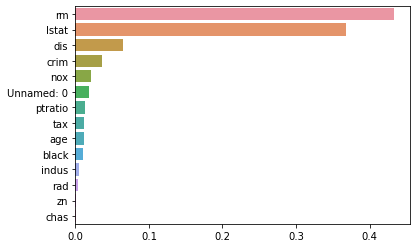

In [24]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

### 회귀 트리의 오버 피팅 시각화

(100, 2)


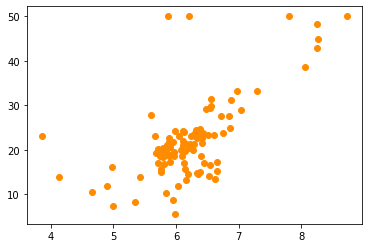

In [28]:
bostonDF_sample = bostonDF[['rm', "medv"]]
bostonDF_sample = bostonDF_sample.sample(n = 100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample['rm'], bostonDF_sample['medv'], c = 'darkorange')

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 - 8.5까지 100개의 데이터 셋 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 rm만, 그리고 결정 데이터인 medv 추출
X_feature = bostonDF_sample['rm'].values.reshape(-1, 1)
y_target = bostonDF_sample['medv'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

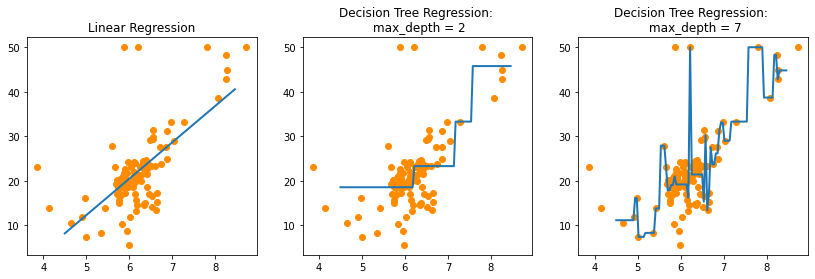

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14, 4), ncols = 3)

# X축 값을 4.5 0 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample['rm'], bostonDF_sample['medv'], c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth = 2')
ax2.scatter(bostonDF_sample['rm'], bostonDF_sample['medv'], c = 'darkorange')
ax2.plot(X_test, pred_rf2, label = 'max_depth : 3', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth = 7')
ax3.scatter(bostonDF_sample['rm'], bostonDF_sample['medv'], c = 'darkorange')
ax3.plot(X_test, pred_rf7, label = 'max_depth : 7', linewidth = 2)